Loading the IMDBB dataset

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
from tensorflow.keras.datasets import imdb

# Load the IMDB movie reviews dataset, keeping only the 10,000 most frequent words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Display how many samples are included in the training and testing sets
print(f"Number of training reviews: {len(train_data)}")
print(f"Number of testing reviews: {len(test_data)}")

# Show the first review represented as a sequence of integer word indices
print("Sample training review (tokenized as integers):", train_data[0])

# Display the sentiment label for the first review (1 = positive, 0 = negative)
print("Sentiment label for the first review:", train_labels[0])


Number of training reviews: 25000
Number of testing reviews: 25000
Sample training review (tokenized as integers): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283,

In [5]:
# Obtain the dictionary that maps each word in the IMDB dataset to its corresponding integer ID
word_index = imdb.get_word_index()

# Create a reverse lookup dictionary so we can translate integer IDs back to actual words
reverse_word_index = {value: key for key, value in word_index.items()}

# Define a helper function that converts an encoded review (list of integers) back into readable text
# The offset of 3 accounts for reserved indices used internally by Keras (e.g., padding, start, unknown)
def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in encoded_review])

# Display the first training review in plain English to verify decoding worked correctly
print("Decoded Review:", decode_review(train_data[0]))

import numpy as np

# Calculate how many positive (1) and negative (0) reviews exist in the training set
unique, counts = np.unique(train_labels, return_counts=True)

# Present the label distribution as a dictionary {label: count} for quick inspection of class balance
print("Label distribution:", dict(zip(unique, counts)))


Decoded Review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have do

In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
train_labels[0]

np.int64(1)

In [8]:
max([max(sequence) for sequence in train_data])

9999

Decoding the reviews back to the text format

In [9]:
# Retrieve the mapping of words to their unique integer identifiers from the IMDB dataset
word_index = imdb.get_word_index()

# Build a reverse mapping (integer ID → word) to allow decoding of encoded reviews back into readable text
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

# Convert the first encoded review (list of integers) into a human-readable sentence
# The offset of 3 accounts for reserved indices (padding, start, and unknown tokens)
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])


Prepping the Data

In [10]:
import numpy as np

# Turn a list of token-index sequences into a 2D binary matrix (“bag-of-words” one-hot)
# Each row corresponds to one review; each column (0..dimension-1) marks whether a token appears (1) or not (0)
def vectorize_sequences(sequences, dimension=10000):
    # Initialize an all-zeros matrix of shape (num_reviews, vocabulary_size)
    results = np.zeros((len(sequences), dimension))
    # For every review, set positions for the tokens present in that review to 1
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

# Vectorize the training set into binary indicator features (presence/absence of words)
x_train = vectorize_sequences(train_data)

# Apply the exact same vectorization to the test set to keep feature space consistent
x_test = vectorize_sequences(test_data)


In [11]:
x_train[0]
len(x_train)
len(x_test)

25000

In [12]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Model Building

**Model 1**

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

# Define a simple feedforward neural network using Keras Sequential API
# The model has two hidden layers with 16 neurons each and ReLU activation
# The final output layer uses a sigmoid activation for binary classification (positive vs negative review)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [14]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Validation Set

In [15]:
# Split the training data into a validation set and a smaller training subset
# The first 10,000 samples are reserved for validation to monitor model performance on unseen data
x_val = x_train[:10000]

# The remaining samples are kept for actual model training
partial_x_train = x_train[10000:]

# Do the same split for the corresponding labels (sentiment targets)
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [16]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (25000, 10000)
y_train shape: (25000,)
x_val shape: (10000, 10000)
y_val shape: (10000,)
x_test shape: (25000, 10000)
y_test shape: (25000,)


Training the model

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6954 - loss: 0.6088 - val_accuracy: 0.8641 - val_loss: 0.4154
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8879 - loss: 0.3629 - val_accuracy: 0.8737 - val_loss: 0.3382
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9111 - loss: 0.2695 - val_accuracy: 0.8778 - val_loss: 0.3048
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9333 - loss: 0.2069 - val_accuracy: 0.8871 - val_loss: 0.2824
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9418 - loss: 0.1764 - val_accuracy: 0.8863 - val_loss: 0.2783
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9546 - loss: 0.1485 - val_accuracy: 0.8869 - val_loss: 0.2793
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9644 - loss: 0.1278 - val_accuracy: 0.8829 - val_loss: 0.2910
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9703 - loss: 0.1067 - val_accuracy: 0.8833 - v

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting Training and Validation Loss

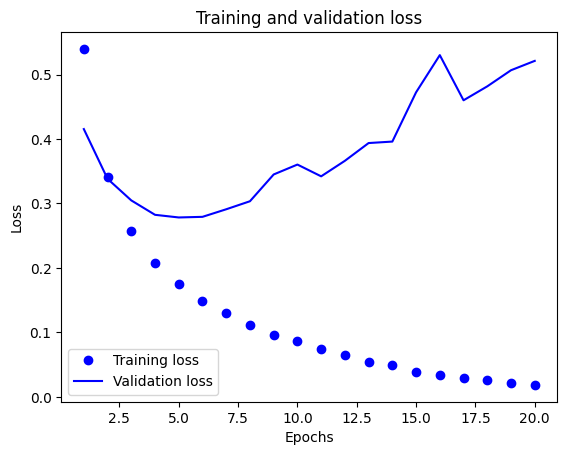

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Training and Validation Accuracy Plot

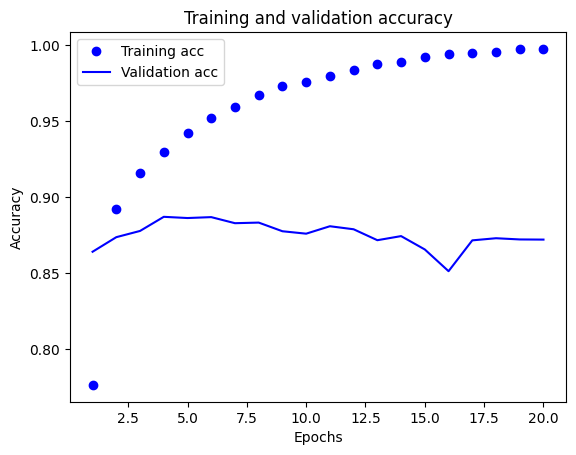

In [20]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining a model from Scratch

In [21]:
# Build a feedforward neural network using the Keras Sequential API
# Two hidden layers with 16 neurons each use ReLU activations for nonlinearity
# The final layer outputs a single sigmoid value representing the probability of a positive review
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model:
# - 'rmsprop' optimizer adapts the learning rate for efficient training
# - 'binary_crossentropy' is suitable for binary sentiment classification
# - Track 'accuracy' as the main performance metric
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Train the model on the entire training set for 4 epochs with batches of 512 samples
# Each epoch passes through all reviews once and updates weights in mini-batches
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate the trained model on the test set to measure generalization performance
results_test = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7100 - loss: 0.5917
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8977 - loss: 0.3126
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9201 - loss: 0.2318
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9324 - loss: 0.1896
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8852 - loss: 0.2865


In [22]:
results_test

[0.28378772735595703, 0.8875600099563599]

In [23]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9405 - loss: 0.1712
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9492 - loss: 0.1475
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9578 - loss: 0.1290
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9606 - loss: 0.1182
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8736 - loss: 0.3392


In [24]:
results_val

[0.33677637577056885, 0.8753600120544434]

In [25]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.11330122],
       [0.99979997],
       [0.58290976],
       ...,
       [0.09009957],
       [0.03666565],
       [0.61592996]], dtype=float32)

Model 2 (with Layer 1, 16 units, loss as binary_crossentropy)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.7111 - loss: 0.5882 - val_accuracy: 0.8636 - val_loss: 0.4147
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8887 - loss: 0.3659 - val_accuracy: 0.8810 - val_loss: 0.3386
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9130 - loss: 0.2853 - val_accuracy: 0.8865 - val_loss: 0.3027
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9272 - loss: 0.2356 - val_accuracy: 0.8876 - val_loss: 0.2872
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9387 - loss: 0.2029 - val_accuracy: 0.8861 - val_loss: 0.2847
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9449 - loss: 0.1846 - val_accuracy: 0.8884 - val_loss: 0.2753
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9529 - loss: 0.1594 - val_accuracy: 0.8878 - val_loss: 0.2790
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9578 - loss: 0.1447 - val_accuracy: 0.8865 - v

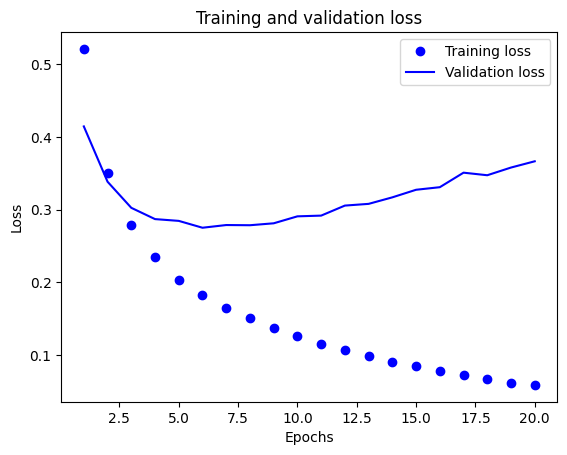

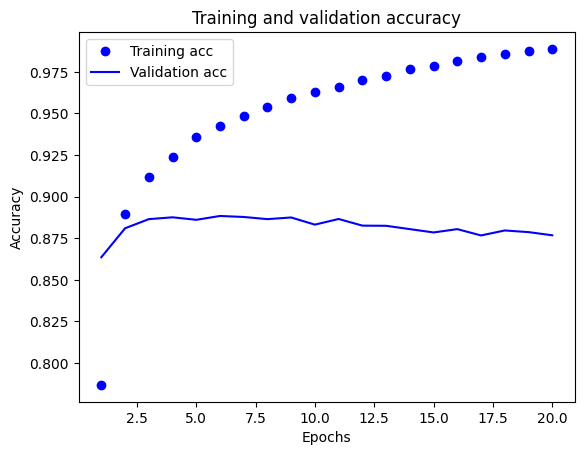

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7592 - loss: 0.5230
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9029 - loss: 0.2821
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9275 - loss: 0.2198
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9341 - loss: 0.1953
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8845 - loss: 0.2824


In [26]:
# Build a simple neural network with a single hidden layer
# The first Dense layer (16 neurons, ReLU) captures nonlinear relationships in the data
# The output layer (1 neuron, sigmoid) outputs the probability of a positive review
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model:
# - 'rmsprop' optimizer is well-suited for binary classification tasks
# - 'binary_crossentropy' measures the difference between predicted probabilities and true labels
# - Track 'accuracy' during training to assess classification performance
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Separate a portion of the training data for validation
# This allows monitoring model performance on unseen data during training
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model for 20 epochs using mini-batches of size 512
# The validation data helps detect overfitting as training progresses
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# Store the training history (loss and accuracy per epoch) for later visualization
history_dict = history.history
history_dict.keys()

# ---------------------------------------------
# Plot training and validation loss per epoch
# ---------------------------------------------
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

# 'bo' plots blue dots for training loss, 'b' plots a line for validation loss
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ---------------------------------------------
# Plot training and validation accuracy per epoch
# ---------------------------------------------
plt.clf()  # Clear the previous figure for a clean new plot
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ---------------------------------------------
# Retrain a fresh model from scratch
# ---------------------------------------------
# This time, use the entire training set for a shorter 4-epoch training,
# based on the observed overfitting pattern from the previous 20-epoch run
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Re-compile with the same settings for consistency
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Train briefly on the full dataset to finalize the model
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate performance on the held-out test data to check generalization
results_test = model.evaluate(x_test, y_test)


In [27]:
results_test

[0.28233233094215393, 0.8869199752807617]

In [28]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9442 - loss: 0.1703
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9487 - loss: 0.1581
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9540 - loss: 0.1411
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9570 - loss: 0.1345
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8777 - loss: 0.3092


In [29]:
results_val

[0.30738240480422974, 0.879360020160675]

In [30]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.17796837],
       [0.9999663 ],
       [0.72042435],
       ...,
       [0.10477766],
       [0.05054465],
       [0.64756536]], dtype=float32)

Model 3
(with 3 hidden layer and 16 units)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.6690 - loss: 0.6387 - val_accuracy: 0.8546 - val_loss: 0.4453
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8838 - loss: 0.3884 - val_accuracy: 0.8692 - val_loss: 0.3406
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9188 - loss: 0.2633 - val_accuracy: 0.8894 - val_loss: 0.2873
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9329 - loss: 0.2040 - val_accuracy: 0.8867 - val_loss: 0.2807
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9490 - loss: 0.1630 - val_accuracy: 0.8822 - val_loss: 0.2971
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9597 - loss: 0.1362 - val_accuracy: 0.8840 - val_loss: 0.2950
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9661 - loss: 0.1132 - val_accuracy: 0.8858 - val_loss: 0.3095
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9753 - loss: 0.0940 - val_accuracy: 0.8809 - v

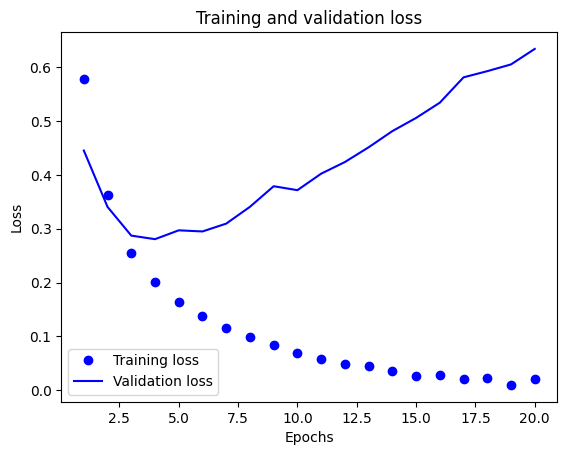

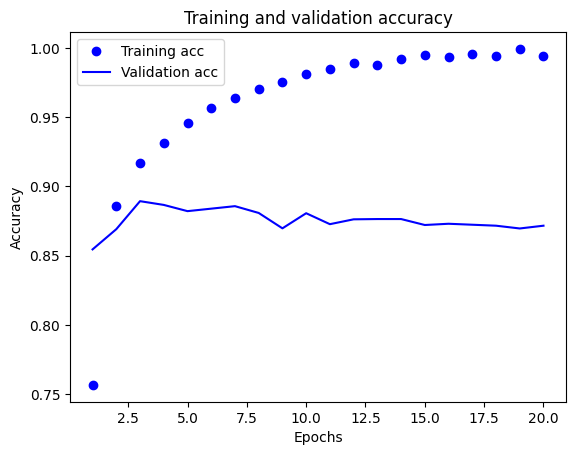

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7265 - loss: 0.5726
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9015 - loss: 0.2796
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9292 - loss: 0.2063
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9420 - loss: 0.1675
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8718 - loss: 0.3235


In [32]:
# Build a neural network with three hidden layers to increase model capacity
# Each hidden layer has 16 units with ReLU to capture nonlinear patterns
# The final Dense(1, sigmoid) outputs a probability for binary sentiment classification
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Configure training:
# - Optimizer: RMSprop (adaptive learning rate, good default for many NN tasks)
# - Loss: binary_crossentropy (appropriate for binary labels)
# - Metric: accuracy to track classification performance
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Hold out a validation split from the beginning of the training data
# This lets us monitor generalization while training on the remaining samples
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train for 20 epochs with mini-batches of 512 and evaluate on the validation set each epoch
# Watch for divergence between training and validation curves as a sign of overfitting
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# Keep the per-epoch metrics (loss/accuracy) for plotting and inspection
history_dict = history.history
history_dict.keys()

# -------------------------------
# Plot training vs. validation loss
# -------------------------------
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

# 'bo' = blue dots for training; 'b' = blue line for validation
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# -------------------------------
# Plot training vs. validation accuracy
# -------------------------------
plt.clf()  # Clear previous figure for a clean accuracy plot
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# -------------------------------
# Retrain the same architecture from scratch
# -------------------------------
# After inspecting the curves, train briefly (4 epochs) on the full training data
# to produce a final model that aims to balance fit and generalization
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate the final model on the test set to estimate out-of-sample performance
results_test = model.evaluate(x_test, y_test)


In [33]:
results_test

[0.32449963688850403, 0.8727999925613403]

In [34]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9493 - loss: 0.1474
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9579 - loss: 0.1276
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9600 - loss: 0.1133
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9690 - loss: 0.0984
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8672 - loss: 0.3933


In [35]:
results_val

[0.3902096152305603, 0.8697599768638611]

In [36]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.074995  ],
       [0.99979275],
       [0.24714473],
       ...,
       [0.04480395],
       [0.01901488],
       [0.7614282 ]], dtype=float32)

Model 4 (with 32 units with 2 hidden layers)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.6791 - loss: 0.6004 - val_accuracy: 0.8593 - val_loss: 0.3803
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9000 - loss: 0.3110 - val_accuracy: 0.8712 - val_loss: 0.3240
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9217 - loss: 0.2325 - val_accuracy: 0.8893 - val_loss: 0.2774
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9417 - loss: 0.1799 - val_accuracy: 0.8862 - val_loss: 0.2769
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9542 - loss: 0.1446 - val_accuracy: 0.8829 - val_loss: 0.2882
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9622 - loss: 0.1233 - val_accuracy: 0.8818 - val_loss: 0.3032
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9696 - loss: 0.1015 - val_accuracy: 0.8832 - val_loss: 0.3101
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9776 - loss: 0.0831 - val_accuracy: 0.8782 - v

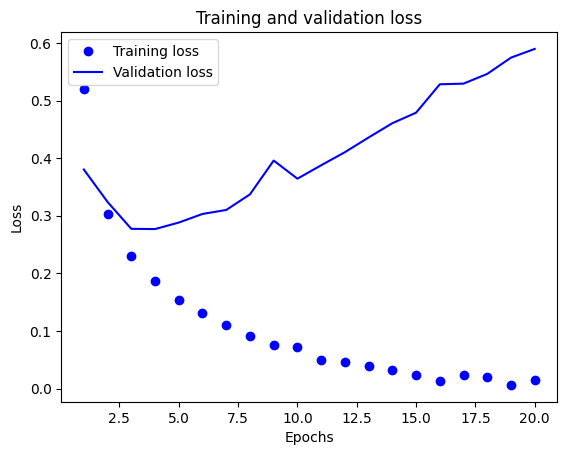

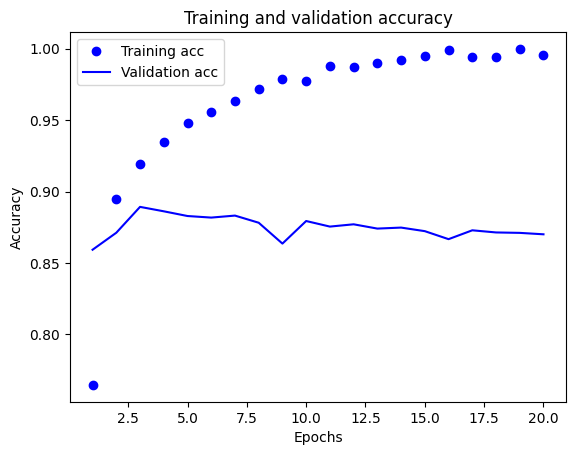

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7198 - loss: 0.5590
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9010 - loss: 0.2780
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9198 - loss: 0.2155
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9389 - loss: 0.1697
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8804 - loss: 0.3011


In [37]:
# Build a neural network with two hidden layers (each 32 units, ReLU) to capture richer nonlinear patterns
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model:
# - Optimizer: RMSprop adapts learning rates during training
# - Loss: binary_crossentropy is appropriate for binary sentiment targets
# - Metric: accuracy provides an easy-to-interpret performance signal
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Set aside a validation split from the start of the training data
# This lets us track generalization while fitting on the remaining samples
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train for 20 epochs with mini-batches of 512 examples; validate each epoch to watch for overfitting
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# Store per-epoch metrics (loss/accuracy) for plotting and inspection
history_dict = history.history
history_dict.keys()

# -------------------------------
# Plot training and validation loss
# -------------------------------
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

# 'bo' = blue dots for training loss; 'b' = blue line for validation loss
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# -------------------------------
# Plot training and validation accuracy
# -------------------------------
plt.clf()  # Clear prior figure to avoid overlaying plots
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# -------------------------------
# Retrain the same architecture from scratch
# -------------------------------
# After inspecting validation curves, do a short 4-epoch fit on the full training set to finalize the model
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate on the held-out test set to estimate generalization performance
results_test = model.evaluate(x_test, y_test)


In [38]:
results_test

[0.2977573275566101, 0.8824399709701538]

In [39]:
results_val

[0.3902096152305603, 0.8697599768638611]

In [40]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.29604164],
       [0.99968463],
       [0.9010025 ],
       ...,
       [0.14420864],
       [0.08190039],
       [0.76809895]], dtype=float32)

Model 5 (with 2 hidden layers, 64 units)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.6702 - loss: 0.5992 - val_accuracy: 0.8659 - val_loss: 0.3634
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.8896 - loss: 0.3118 - val_accuracy: 0.8089 - val_loss: 0.4311
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9015 - loss: 0.2470 - val_accuracy: 0.8891 - val_loss: 0.2732
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9393 - loss: 0.1719 - val_accuracy: 0.8865 - val_loss: 0.2777
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9486 - loss: 0.1445 - val_accuracy: 0.8866 - val_loss: 0.2867
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9670 - loss: 0.1088 - val_accuracy: 0.8757 - val_loss: 0.3131
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9718 - loss: 0.0875 - val_accuracy: 0.8825 - val_loss: 0.3188
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9761 - loss: 0.0765 - val_accuracy: 0.8806 -

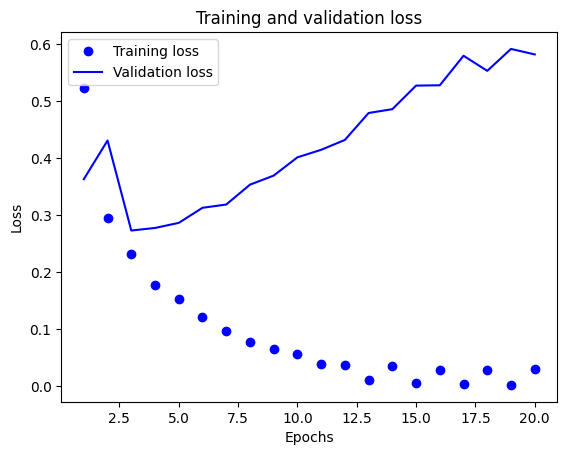

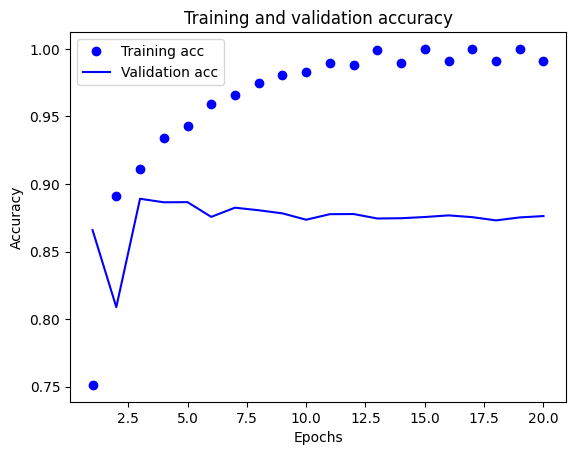

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7048 - loss: 0.5514
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8890 - loss: 0.2769
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9218 - loss: 0.2019
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9427 - loss: 0.1587
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8790 - loss: 0.3024


In [41]:
# Build a neural network with two hidden layers (each 64 units, ReLU) for greater representational power
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile training configuration:
# - Optimizer: RMSprop (adaptive learning rate, strong default for many NN tasks)
# - Loss: binary_crossentropy (appropriate for 0/1 sentiment labels)
# - Metrics: track accuracy to monitor classification performance
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Create a validation split from the start of the training data
# Validation metrics help detect overfitting and guide epoch selection
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train for 20 epochs with batch size 512 and evaluate on the validation set each epoch
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# Keep per-epoch history (loss/accuracy) for later analysis and plotting
history_dict = history.history
history_dict.keys()

# ---------------------------------------
# Plot training and validation loss curves
# ---------------------------------------
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

# 'bo' = blue dots for training loss; 'b' = blue line for validation loss
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ---------------------------------------
# Plot training and validation accuracy curves
# ---------------------------------------
plt.clf()  # Clear the previous figure for a clean accuracy plot
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ---------------------------------------
# Retrain the same architecture from scratch
# ---------------------------------------
# After reviewing the curves, do a short 4-epoch fit on the full training data to finalize the model
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate final model on the test set to estimate generalization performance
results_test = model.evaluate(x_test, y_test)


In [42]:
results_test

[0.2996939420700073, 0.8815199732780457]

In [43]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9446 - loss: 0.1444
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9586 - loss: 0.1148
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9660 - loss: 0.0953
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9768 - loss: 0.0719
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8721 - loss: 0.3692


In [44]:
results_val

[0.3678058981895447, 0.8730800151824951]

In [45]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.06008634],
       [0.9999747 ],
       [0.7189927 ],
       ...,
       [0.09979434],
       [0.0132689 ],
       [0.9362539 ]], dtype=float32)

Model 6 (with 2 hidden layers, 16 units and tanh activation)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.6976 - loss: 0.2032 - val_accuracy: 0.8572 - val_loss: 0.1216
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8861 - loss: 0.1039 - val_accuracy: 0.8620 - val_loss: 0.1048
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9148 - loss: 0.0726 - val_accuracy: 0.8806 - val_loss: 0.0889
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9345 - loss: 0.0561 - val_accuracy: 0.8793 - val_loss: 0.0878
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9507 - loss: 0.0438 - val_accuracy: 0.8766 - val_loss: 0.0923
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9571 - loss: 0.0382 - val_accuracy: 0.8678 - val_loss: 0.1008
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9629 - loss: 0.0333 - val_accuracy: 0.8714 - val_loss: 0.0954
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9710 - loss: 0.0271 - val_accuracy: 0.8824 - v

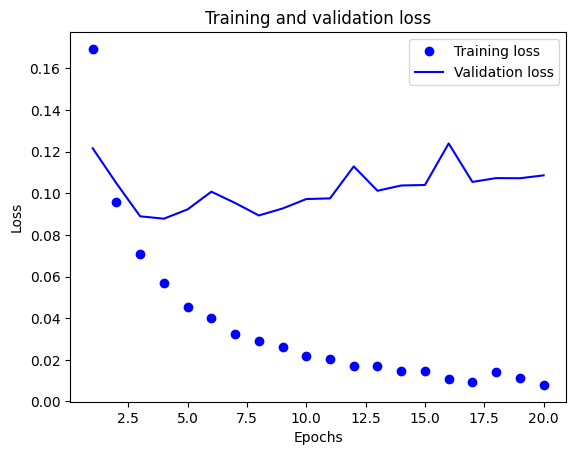

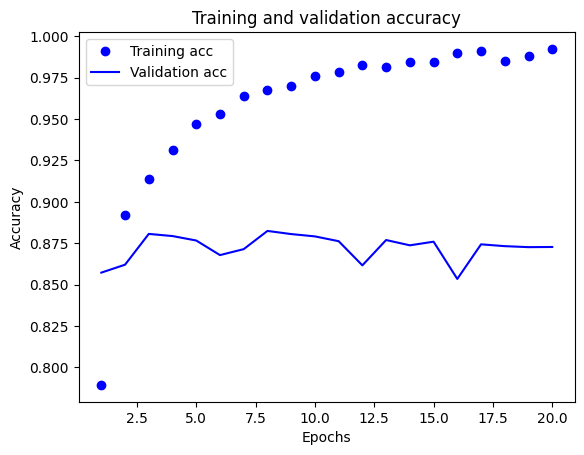

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7312 - loss: 0.1879
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8989 - loss: 0.0821
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9236 - loss: 0.0606
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9396 - loss: 0.0480
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8688 - loss: 0.0991


In [46]:
# Build a neural network with two hidden layers using tanh activations
# tanh outputs in [-1, 1], which can help when inputs are centered but may saturate for large magnitudes
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")  # Sigmoid produces a probability for binary sentiment
])

# Compile training configuration
# - Optimizer: RMSprop adapts learning rates, a solid default for small feedforward nets
# - Loss: MSE is usable for probabilistic outputs but usually not ideal for classification
#         (binary_crossentropy often learns faster and calibrates probabilities better)
# - Metric: accuracy for an easy-to-interpret performance signal
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Create a validation split from the start of the training data
# This provides an unbiased check during training to detect overfitting
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model for 20 epochs with mini-batches of size 512
# Validation data is evaluated each epoch to monitor generalization
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# Keep a reference to the per-epoch training history (loss/accuracy)
history_dict = history.history
history_dict.keys()

# -------------------------------
# Plot training and validation loss
# -------------------------------
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

# 'bo' marks training points (blue dots); 'b' draws a line for validation curve
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# -------------------------------
# Plot training and validation accuracy
# -------------------------------
plt.clf()  # Clear the previous figure to avoid overlap
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# -------------------------------
# Retrain the same architecture from scratch
# -------------------------------
# After inspecting curves, do a short 4-epoch fit on the full training set to finalize the model
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

# Keep the same compile setup for consistency with the earlier run
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Brief training on all available training data
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate on the held-out test set to estimate generalization performance
results_test = model.evaluate(x_test, y_test)


In [47]:
results_test

[0.09916144609451294, 0.8677600026130676]

In [48]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9472 - loss: 0.0432
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9539 - loss: 0.0383
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9613 - loss: 0.0324
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9633 - loss: 0.0315
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8685 - loss: 0.1039


In [49]:
results_val

[0.10173749178647995, 0.8723999857902527]

In [50]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.00969301],
       [0.9997679 ],
       [0.90247154],
       ...,
       [0.19492652],
       [0.01641101],
       [0.8250595 ]], dtype=float32)

Model 7 (with 2 hidden layers with 16 units per layer with relu activation and "mse" as loss function)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.7148 - loss: 0.2116 - val_accuracy: 0.8214 - val_loss: 0.1452
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8736 - loss: 0.1194 - val_accuracy: 0.8591 - val_loss: 0.1106
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9062 - loss: 0.0855 - val_accuracy: 0.8823 - val_loss: 0.0930
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9279 - loss: 0.0665 - val_accuracy: 0.8822 - val_loss: 0.0901
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9422 - loss: 0.0535 - val_accuracy: 0.8827 - val_loss: 0.0866
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9503 - loss: 0.0478 - val_accuracy: 0.8843 - val_loss: 0.0847
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9572 - loss: 0.0416 - val_accuracy: 0.8842 - val_loss: 0.0860
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9634 - loss: 0.0363 - val_accuracy: 0.8828 - v

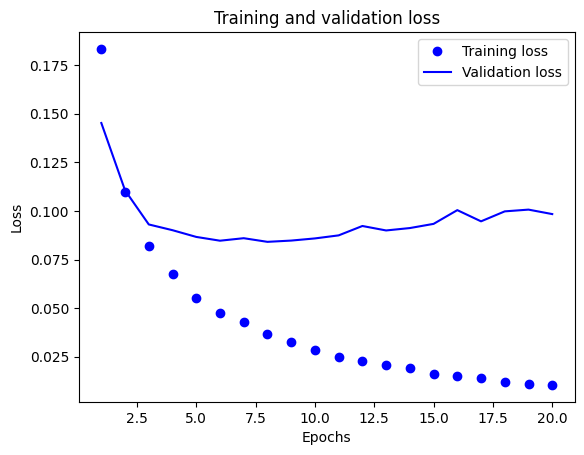

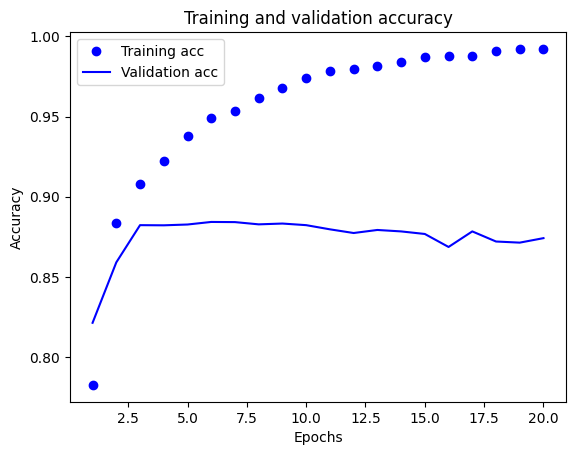

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7105 - loss: 0.1999
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8886 - loss: 0.0972
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9149 - loss: 0.0720
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9302 - loss: 0.0597
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8831 - loss: 0.0868


In [51]:
# Build a feedforward network with two hidden layers (each 16 units, ReLU)
# ReLU helps capture nonlinear relationships while keeping gradients stable
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # Sigmoid outputs a probability for binary sentiment
])

# Compile training configuration
# - Optimizer: RMSprop adapts learning rates automatically
# - Loss: MSE (works but is atypical for classification; BCE is usually better for probability targets)
# - Metric: accuracy for an easy-to-interpret performance indicator
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Create a validation split from the front of the training set
# Validation metrics help detect overfitting during training
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train for 20 epochs with mini-batches of 512 examples; evaluate on validation data each epoch
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# Keep the per-epoch history (loss and accuracy) for plotting/analysis
history_dict = history.history
history_dict.keys()

# -------------------------------
# Plot training and validation loss
# -------------------------------
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

# 'bo' = blue dots for training; 'b' = blue line for validation
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# -------------------------------
# Plot training and validation accuracy
# -------------------------------
plt.clf()  # Clear previous figure to avoid overlap
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# -------------------------------
# Retrain the same architecture from scratch
# -------------------------------
# Short 4-epoch training on the full dataset to produce a final model after validation review
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate on the held-out test set to estimate out-of-sample performance
results_test = model.evaluate(x_test, y_test)


In [52]:
results_test

[0.08546152710914612, 0.8859599828720093]

In [53]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9403 - loss: 0.0510
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9496 - loss: 0.0452
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9528 - loss: 0.0424
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9583 - loss: 0.0385
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8722 - loss: 0.0945


In [54]:
results_val

[0.09278447926044464, 0.8754400014877319]

In [55]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.12646325],
       [0.999856  ],
       [0.94498193],
       ...,
       [0.25320247],
       [0.10291467],
       [0.8583161 ]], dtype=float32)

Model 8
with 1 hidden layer , 16 units, relu activation, mse as loss function and L2 regularization

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.7051 - loss: 0.3948 - val_accuracy: 0.8548 - val_loss: 0.1875
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8690 - loss: 0.1725 - val_accuracy: 0.8567 - val_loss: 0.1623
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8757 - loss: 0.1540 - val_accuracy: 0.8549 - val_loss: 0.1590
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8817 - loss: 0.1484 - val_accuracy: 0.8670 - val_loss: 0.1517
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8857 - loss: 0.1434 - val_accuracy: 0.8556 - val_loss: 0.1541
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8741 - loss: 0.1451 - val_accuracy: 0.8491 - val_loss: 0.1546
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8792 - loss: 0.1412 - val_accuracy: 0.8647 - val_loss: 0.1475
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8771 - loss: 0.1403 - val_accuracy: 0.8685 - v

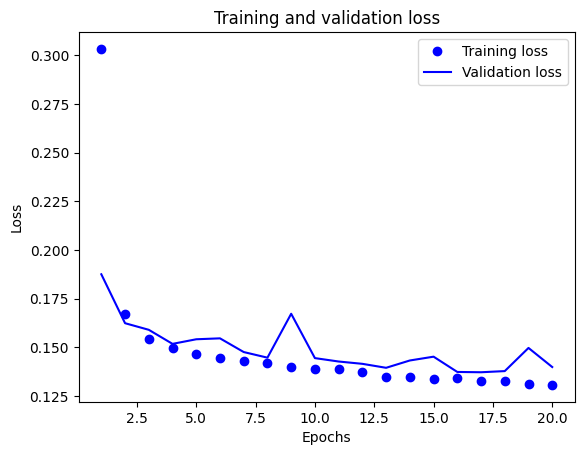

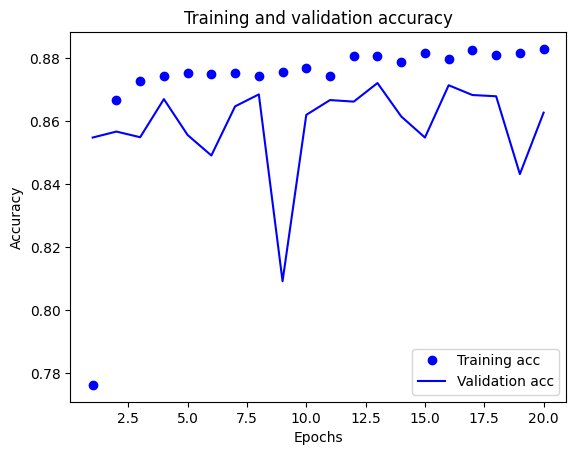

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7186 - loss: 0.3497
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8640 - loss: 0.1572
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8625 - loss: 0.1506
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8722 - loss: 0.1431
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8476 - loss: 0.1536


In [56]:
# Build a shallow neural network with a single hidden layer
# - Hidden layer: 16 ReLU units with L2 (ridge) weight penalty to discourage large weights and reduce overfitting
# - Output layer: 1 sigmoid unit producing a probability for binary sentiment classification
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation="sigmoid")
])

# Configure training:
# - Optimizer: RMSprop (adaptive learning rate; good default for small feedforward nets)
# - Loss: MSE (works but is atypical for classification; binary_crossentropy is usually better calibrated)
# - Metrics: accuracy to monitor classification performance during training
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Set aside a validation split to monitor generalization while training on the remaining data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train for 20 epochs using mini-batches of 512; evaluate on validation set after each epoch
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# Keep a handle to the per-epoch metrics (loss/accuracy) for plotting/analysis
history_dict = history.history
history_dict.keys()

# -------------------------------------------
# Plot training and validation loss per epoch
# -------------------------------------------
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")   # blue dots for training loss
plt.plot(epochs, val_loss_values, "b", label="Validation loss")  # blue line for validation loss
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# -------------------------------------------
# Plot training and validation accuracy curves
# -------------------------------------------
plt.clf()  # clear the previous figure to avoid overlapping plots
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ------------------------------------------------
# Retrain the same architecture from scratch
# ------------------------------------------------
# After inspecting curves, do a short 4-epoch fit on the full training data to produce a final model
model = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.01) ),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate generalization on the held-out test set
results_test = model.evaluate(x_test, y_test)


In [57]:
results_test

[0.15371954441070557, 0.8478800058364868]

In [58]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8716 - loss: 0.1425
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8723 - loss: 0.1411
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8731 - loss: 0.1394
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8729 - loss: 0.1381
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8454 - loss: 0.1496


In [59]:
results_val

[0.14988422393798828, 0.8452399969100952]

In [60]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.35849485],
       [0.9248767 ],
       [0.5299055 ],
       ...,
       [0.18982439],
       [0.19584066],
       [0.35093224]], dtype=float32)

Model 9 (with 1 hidden layer with 16 units with Dropout(0.5))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.6388 - loss: 0.2224 - val_accuracy: 0.8461 - val_loss: 0.1525
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8242 - loss: 0.1472 - val_accuracy: 0.8675 - val_loss: 0.1212
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8639 - loss: 0.1206 - val_accuracy: 0.8696 - val_loss: 0.1095
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8835 - loss: 0.1053 - val_accuracy: 0.8852 - val_loss: 0.0965
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8989 - loss: 0.0928 - val_accuracy: 0.8860 - val_loss: 0.0928
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9112 - loss: 0.0828 - val_accuracy: 0.8848 - val_loss: 0.0905
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9171 - loss: 0.0760 - val_accuracy: 0.8879 - val_loss: 0.0870
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9244 - loss: 0.0710 - val_accuracy: 0.8863 - v

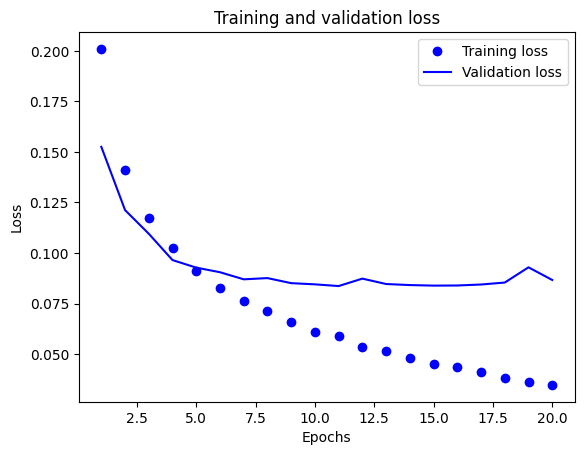

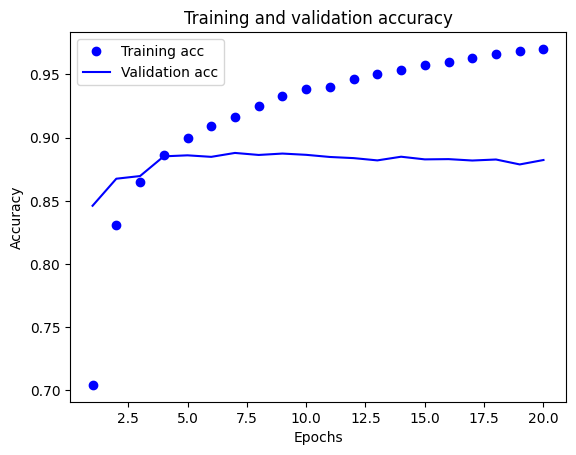

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6959 - loss: 0.1987
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8657 - loss: 0.1123
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8928 - loss: 0.0921
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9050 - loss: 0.0795
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8871 - loss: 0.0852


In [61]:
# Create a simple binary classifier with dropout regularization (rate = 0.5)
# - Dense(16, ReLU): learns nonlinear features
# - Dropout(0.5): randomly drops 50% of units during training to reduce overfitting
# - Dense(1, Sigmoid): outputs a probability for the positive class
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Set up training configuration
# - Optimizer: RMSprop adapts learning rates automatically
# - Loss: MSE (works but is unconventional for classification; BCE is usually preferred)
# - Metric: accuracy to track classification performance
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Hold out a validation split to monitor generalization while training
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train for 20 epochs with batch size 512; validate after each epoch
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# Keep the per-epoch metrics (loss/accuracy) for analysis and plotting
history_dict = history.history
history_dict.keys()

# -------------------------------
# Plot training and validation loss
# -------------------------------
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

# 'bo' = blue dots for training; 'b' = blue line for validation
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# -------------------------------
# Plot training and validation accuracy
# -------------------------------
plt.clf()  # Clear previous figure before plotting accuracy
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# -------------------------------
# Retrain the same architecture from scratch
# -------------------------------
# Short 4-epoch fit on the full training data to finalize the model after validation review
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate on the test set to estimate out-of-sample performance
results_test = model.evaluate(x_test, y_test)


In [62]:
results_test

[0.08449210971593857, 0.8889600038528442]

In [63]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9190 - loss: 0.0698
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9246 - loss: 0.0647
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9348 - loss: 0.0587
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9385 - loss: 0.0547
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8864 - loss: 0.0833


In [64]:
results_val

[0.08249960094690323, 0.8873199820518494]

In [65]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.0934554 ],
       [0.99913937],
       [0.7092949 ],
       ...,
       [0.12838961],
       [0.06529046],
       [0.6255561 ]], dtype=float32)

Model 10 (1 hidden layer with 32 units with Tanh activation and Dropuout(0.5), MSE)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.6819 - loss: 0.2041 - val_accuracy: 0.8694 - val_loss: 0.1224
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8813 - loss: 0.1115 - val_accuracy: 0.8733 - val_loss: 0.1032
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9096 - loss: 0.0846 - val_accuracy: 0.8548 - val_loss: 0.1047
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9147 - loss: 0.0747 - val_accuracy: 0.8886 - val_loss: 0.0857
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9283 - loss: 0.0647 - val_accuracy: 0.8892 - val_loss: 0.0831
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9375 - loss: 0.0561 - val_accuracy: 0.8850 - val_loss: 0.0839
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9473 - loss: 0.0503 - val_accuracy: 0.8848 - val_loss: 0.0839
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9475 - loss: 0.0483 - val_accuracy: 0.8841 - v

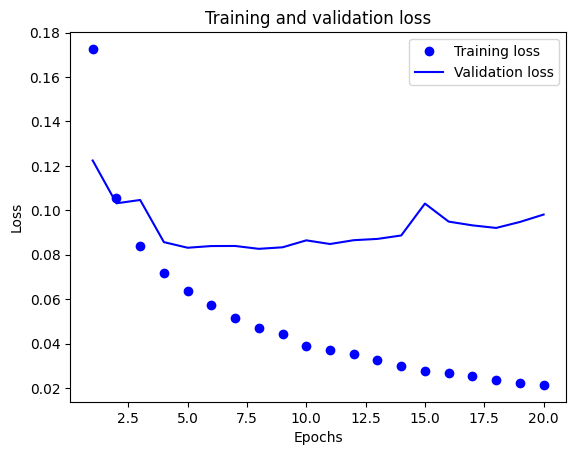

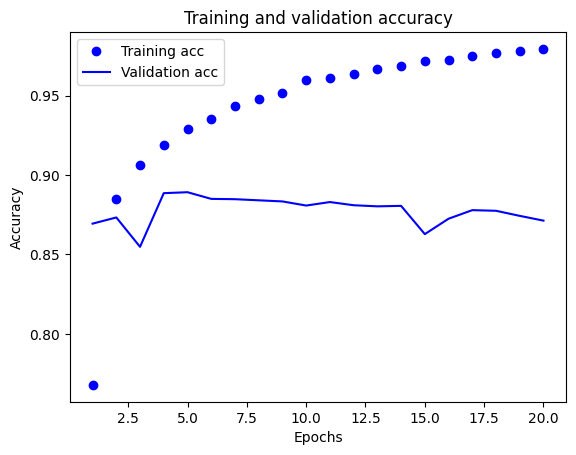

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7299 - loss: 0.1863
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8858 - loss: 0.0979
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9077 - loss: 0.0775
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9207 - loss: 0.0662
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8879 - loss: 0.0832


In [66]:
# Build a simple binary classifier with dropout regularization (rate = 0.5)
# - Dense(32, tanh): learns nonlinear features with outputs in [-1, 1]
# - Dropout(0.5): randomly disables 50% of units during training to curb overfitting
# - Dense(1, sigmoid): outputs a probability for the positive class
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Configure training
# - Optimizer: RMSprop adapts learning rates automatically
# - Loss: MSE (works but is uncommon for classification; binary_crossentropy is typically better)
# - Metric: accuracy to track classification performance
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Prepare a validation split to monitor generalization while training
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Fit for 20 epochs with batch size 512; evaluate on validation data each epoch
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# Keep the per-epoch history (loss/accuracy) for analysis and plotting
history_dict = history.history
history_dict.keys()

# -------------------------------------------
# Plot: training vs. validation loss per epoch
# -------------------------------------------
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")   # blue dots for training loss
plt.plot(epochs, val_loss_values, "b", label="Validation loss")  # blue line for validation loss
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# -------------------------------------------
# Plot: training vs. validation accuracy per epoch
# -------------------------------------------
plt.clf()  # clear previous figure before plotting accuracy
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# -------------------------------------------
# Retrain the same architecture from scratch
# -------------------------------------------
# After inspecting curves, do a brief 4-epoch fit on the full training data to finalize the model
model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Keep the same compile settings for consistency with the earlier run
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate on the held-out test set to estimate generalization performance
results_test = model.evaluate(x_test, y_test)


In [67]:
results_test

[0.08267233520746231, 0.8890799880027771]

In [68]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9283 - loss: 0.0601
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9352 - loss: 0.0541
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9402 - loss: 0.0506
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9484 - loss: 0.0453
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8816 - loss: 0.0882


In [69]:
results_val

[0.08683992922306061, 0.884119987487793]

In [70]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.11535785],
       [0.9999602 ],
       [0.8911962 ],
       ...,
       [0.1502401 ],
       [0.0864874 ],
       [0.62488645]], dtype=float32)